In [36]:
# Import necessary modules
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/628/datasets/a7e65287ebb197b1267b5042955f27502ec65f31/gm_2008_region.csv')

In [3]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [5]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


<AxesSubplot:>

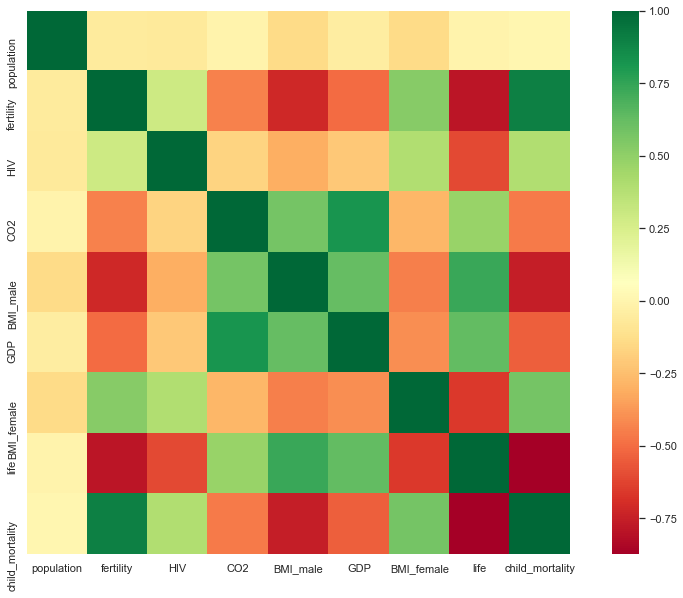

In [6]:
# Explorer the data
sns.set_theme()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [7]:
df.Region.value_counts()

Europe & Central Asia         41
Sub-Saharan Africa            40
America                       27
East Asia & Pacific           14
Middle East & North Africa    10
South Asia                     7
Name: Region, dtype: int64

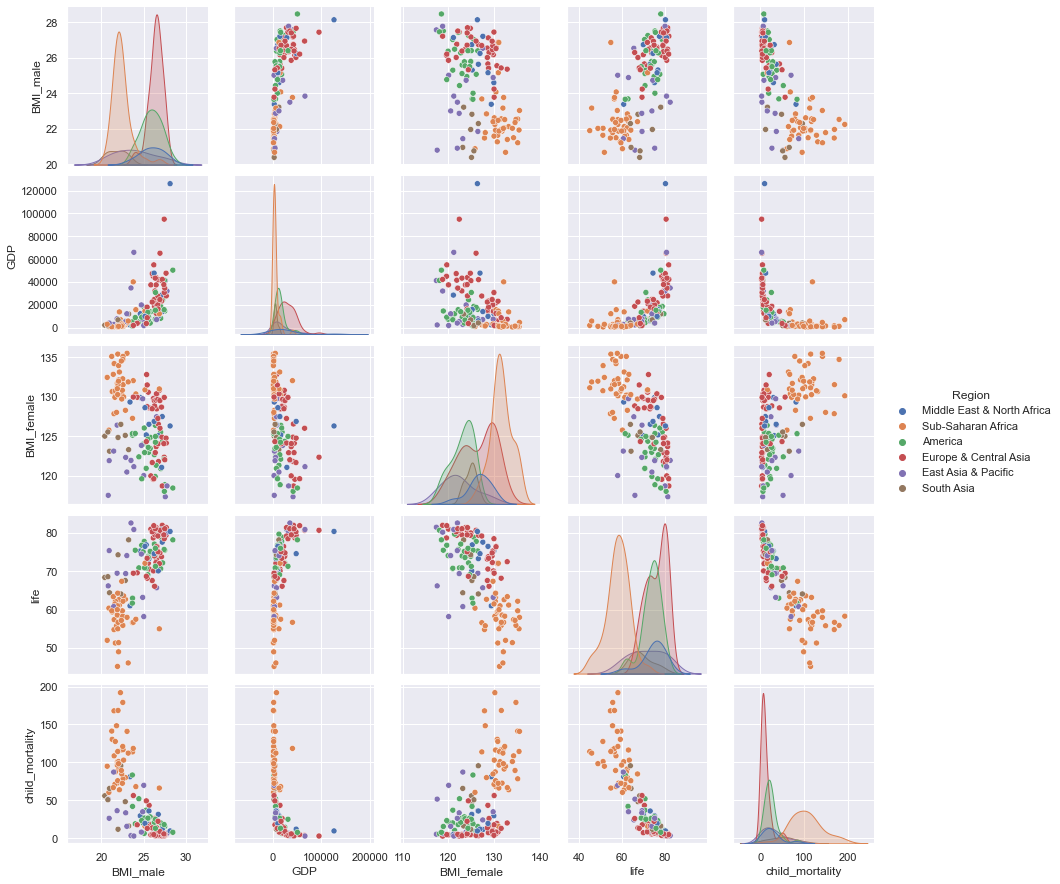

In [8]:
# Plot out a pairplot for four columns at a time
excol = ['population','fertility', 'HIV','CO2']
df1 = df.drop(excol, axis=1)
sns.pairplot(df1, hue='Region')

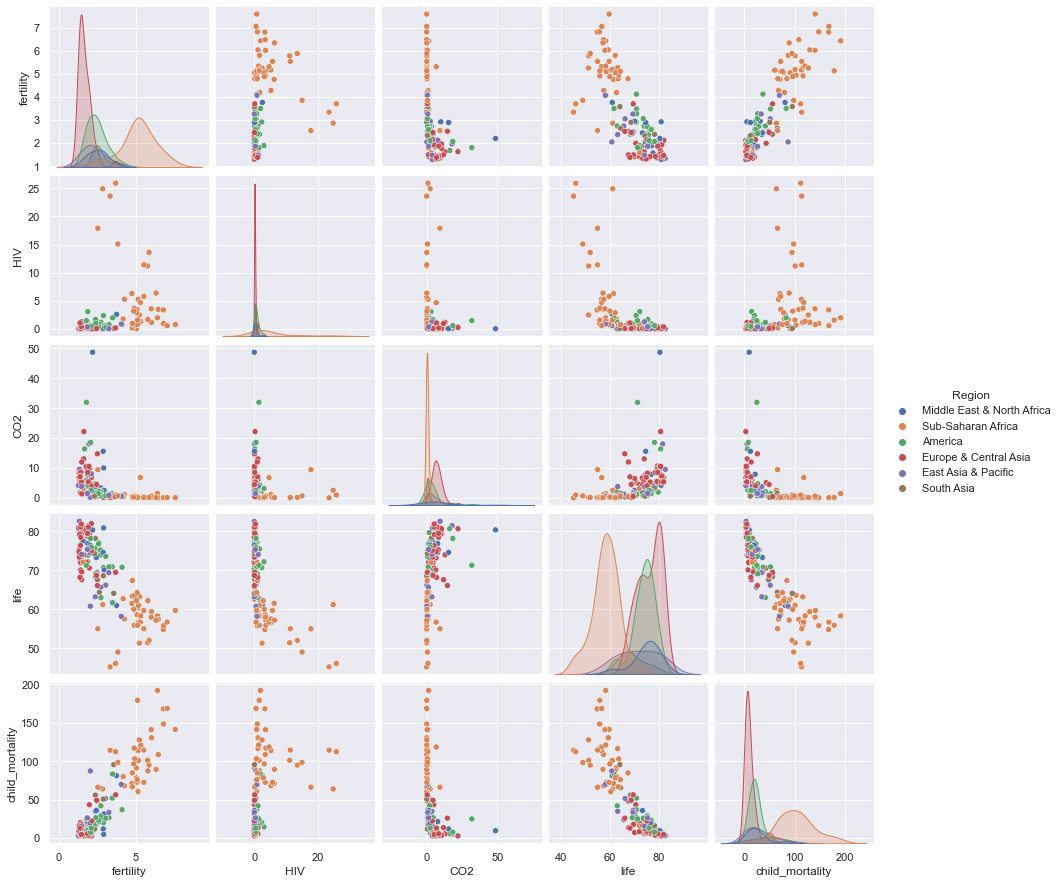

In [9]:
# Plot out a pairplot for four columns at a time
excol = ['population','BMI_male','GDP','BMI_female']
df1 = df.drop(excol, axis=1)
sns.pairplot(df1, hue='Region')

In [10]:
# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)


In [11]:
# Reshape X and y
y_fertility = y.reshape(-1,1)
X_fertility = X.reshape(-1,1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_fertility.shape)
print("Dimensions of X after reshaping: ", X_fertility.shape)

Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


# Fit & predict for regression on fertility alone

In [12]:
# Create the regressor: reg
reg = LinearRegression()

In [13]:
# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

In [14]:
# Fit the model to the data
reg.fit(X_fertility,y_fertility)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y_fertility))

0.6192442167740035


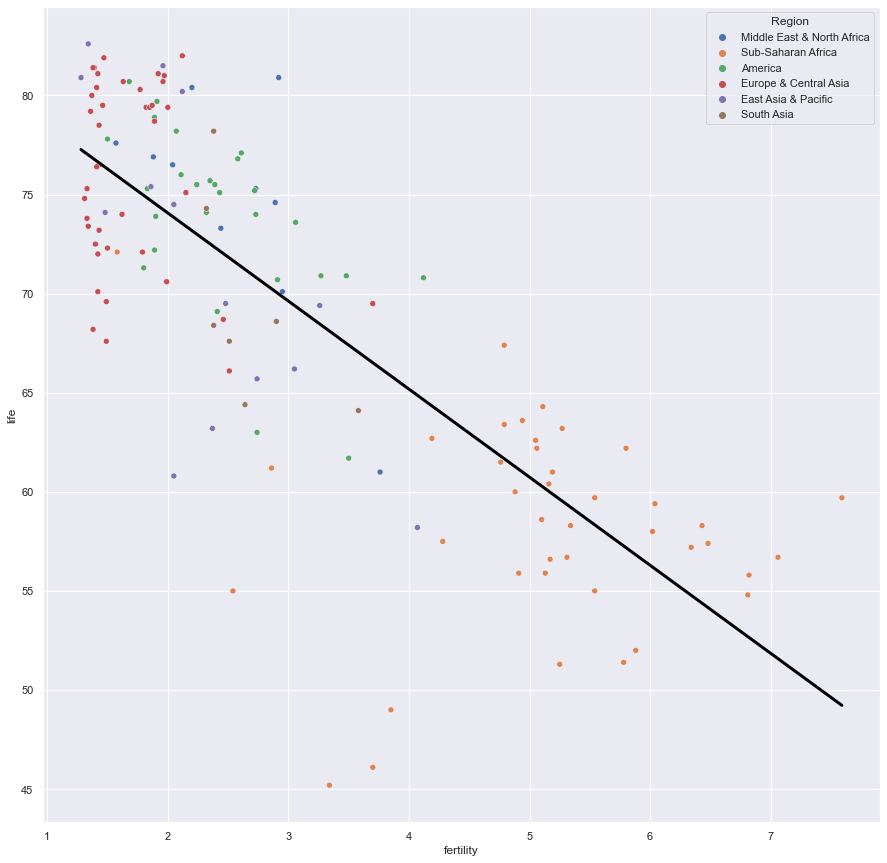

In [18]:
# Plot regression line over the scatter plot of the fertility vs. Life Expectancy data
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(x='fertility', y='life', data=df, hue='Region')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

The line captures the underlying trend in the data pretty well. And the performance is quite decent for this basic regression model with only one feature - 0.6192!

# Train/test split for regression using ALL features

In [30]:
# Create arrays for features and target variable
y_all = df['life'].values
X_all = df.drop(['life','Region'], axis=1).values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y_all.shape)
print("Dimensions of X before reshaping: ", X_all.shape)

Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139, 8)


In [32]:
# Reshape X and y
y_all = y_all.reshape(-1,1)
X_all = X_all.reshape(-1,8)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_all.shape)
print("Dimensions of X after reshaping: ", X_all.shape)

Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 8)


In [33]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

In [34]:
# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430135
Root Mean Squared Error: 3.2476010800369455


Using all features has improved the model score. This makes sense, as the model has more information to learn from.
The model improved from an R^2 with one feature of 0.6192 
to an R^2 with all features of 0.8380

# Cross-validation in scikit-learn

Using the cross_val_score imported from sklearn.model_selection we can perform 5-fold cross validation
which will split our data into 5 distinct sets and then we run the regression with the test data holdout of each set for a total of 5 times
![cross_val_example](./images/cross_validation_example.png)

In [39]:
# Instantiate the LinearRegression model and run cross_val_score

reg = LinearRegression()
cv_results = cross_val_score(reg, X_test, y_test, cv=5)
print(f"cv_results from 5-fold cross validation: {cv_results}")

cv_results from 5-fold cross validation: [0.76010955 0.9536402  0.82433543 0.80176034 0.92544808]


In [ ]:
# We can then calculate the mean of the cv_results
print(f"Mean of cv_results with cv=)